## Principal Component Analysis (PCA)
*Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing
interpretability but at the same time minimizing information loss. PCA is often used to simplify data and reduce
noise.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Andmete laadimine

In [2]:
# Change file name as required 
with open ("../data/df_cleaned.csv", mode='r', encoding='utf-8') as f:
    timestamp_line = f.readline().strip()
    timestamp = timestamp_line.removeprefix("#").lstrip() if timestamp_line.startswith("#") else None
df = pd.read_csv("../data/df_cleaned.csv", sep=',', skiprows=1 if timestamp else None)

print(f"Loaded data with timestamp {timestamp}")

Loaded data with timestamp None


In [3]:
df.shape

(48522, 47)

Nagu näha, on meil alguses 47 dimensiooni. Proovime dimensioonide arvu PCA abil vähendada. 

#### 2. Kategooriliste andmete teisendamine
*PCA only works for numerical data, categorical variables need to be converted (encoded) to numerical.*

In [4]:
pd.set_option('display.max_columns', 47)
#df.head()

In [5]:
df.dtypes

person.UUID                      object
study.place.UUID                 object
debug.study.place.ID              int64
debug.student.matricula.nr       object
study.level                      object
code.of.curriculum                int64
curriculum.UUID                  object
faculty.code                     object
year_immatriculation              int64
year_exmatriculation              int64
semester_current                float64
study_period_in_years             int64
dropout                           int64
admission.special.conditions    float64
prev.study.level                 object
prev.study.level.factor           int64
nr.of.previous.studies.in.UT      int64
nr.of.previous.finished           int64
normalized_score                float64
cum.credits.earned              float64
cum.extracurricular.credits     float64
cum.all.results                   int64
cum.negative.results              int64
cum.grade.A                       int64
cum.grade.B                       int64


**Dropping person.UUID, study.place.UUID and debug.student.matricula.nr, because it's not reasonable to encode them to categorical values**

In [6]:
df = df.drop(["person.UUID", "study.place.UUID", "debug.student.matricula.nr"], axis=1)

**Study level**

In [7]:
df["study.level"].unique()

array(['514 Professional higher education programmes',
       "614 Master's programmes", "511 Bachelor's programmes",
       "503 Integrated Bachelor's and Master's programmes"], dtype=object)

In [8]:
df["study.level"] = df["study.level"].astype('category')
df["study.level"] = df["study.level"].cat.codes

**Curriculum**

In [9]:
df["curriculum.UUID"].unique()

array(['995f22629fcc2b38dc157f49913b8c53',
       '7bb31c839c3fcebd9f0affdf22a174bc',
       '03423eb4b662ed11afdc8302e3e57b24',
       '52c8137167fe84931bcd720a453ebd63',
       '2e3ef51eae31d36425b0f4ec97bad45a',
       'f870249c017b1cab5519a9fde369602a',
       '8f43e130bb6bdaebabaf545bd1c5933c',
       'f6160b10a13bbdee763d9a1e1b816288',
       '918bf16909bbd8150f84c1206fa39524',
       '8f68219aaaafb3fa6261e51c3c8181c7',
       'f2cb03399a415d2ee973e266240c81f5',
       '52d1ee15f0f9c87f031a2a6bb29c7022',
       '592d57af47173ae7ce838cef164d4afe',
       '20f769141f4c00c365910e1681f1a173',
       '3025acc146b39218e3fb047b7be9e10c',
       '92ebd5c84cc1427358a8eef0e2a3704d',
       '65b00ddee74c4ee4eb67c03aab2ab06d',
       '71018ffbfbcc575473215d90f8a098fe',
       '0e63cf7c18f370f03d60365860b21b99',
       'bed517c3296f95c41ad7e0dae62cb2b1',
       '9153e408882cd209ad561fd98b793fbd',
       '91d3026741e127f75d3fcebfeb71c763',
       '2579994bc127c4fcbded37d72ec10a3a',
       '940

In [10]:
df["curriculum.UUID"] = df["curriculum.UUID"].astype('category')
df["curriculum.UUID"] = df["curriculum.UUID"].cat.codes

**Faculty code**

In [11]:
df["faculty.code"].unique()

array(['HV', 'LT', 'SV', 'MV'], dtype=object)

In [12]:
df["faculty.code"] = df["faculty.code"].astype('category')
df["faculty.code"] = df["faculty.code"].cat.codes

**Previous study level**

In [13]:
df["prev.study.level"].unique()

array(["Master's programmes", "Bachelor's programmes",
       '1-year teacher training programmes', 'Doctoral programmes',
       'Vocational education based on secondary education',
       "Integrated Bachelor's and Master's programmes",
       'General secondary education',
       'Professional higher education programmes',
       'Diploma study programmes', 'Vocational secondary education',
       'The residency training of medical specialists',
       'Secondary specialised vocational education',
       'Residentship programmes',
       'Vocational secondary courses based on basic education',
       'Viienda taseme kutseõppe jätkuõpe',
       'Vocational secondary courses based on secondary education',
       'Vocational higher education programmes',
       'Secondary vocational education',
       'Viienda taseme kutseõppe esmaõpe',
       'Post-secondary specialised vocational education',
       'Neljanda taseme kutseõppe esmaõpe'], dtype=object)

In [14]:
df["prev.study.level"] = df["prev.study.level"].astype('category')
df["prev.study.level"] = df["prev.study.level"].cat.codes

**Workload**

In [15]:
df.workload.unique()

array(['full', 'part-time'], dtype=object)

In [16]:
df["workload"] = df["workload"].astype('category')
df["workload"] = df["workload"].cat.codes

In [17]:
df.dtypes

debug.study.place.ID              int64
study.level                        int8
code.of.curriculum                int64
curriculum.UUID                   int16
faculty.code                       int8
year_immatriculation              int64
year_exmatriculation              int64
semester_current                float64
study_period_in_years             int64
dropout                           int64
admission.special.conditions    float64
prev.study.level                   int8
prev.study.level.factor           int64
nr.of.previous.studies.in.UT      int64
nr.of.previous.finished           int64
normalized_score                float64
cum.credits.earned              float64
cum.extracurricular.credits     float64
cum.all.results                   int64
cum.negative.results              int64
cum.grade.A                       int64
cum.grade.B                       int64
cum.grade.C                       int64
cum.grade.D                       int64
cum.grade.E                       int64


No categorical/object type variables.

#### 3. Andmete standardiseerimine
*PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. If you don’t scale your data, it can have a negative effect on your algorithm.*

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [20]:
scaled_data = scaler.transform(df)
scaled_data

array([[ 1.62980685,  0.21116071,  1.63210434, ..., -0.3901801 ,
         1.64842542,  3.39060774],
       [-1.4770986 ,  1.18114459, -0.70652484, ..., -0.3901801 ,
        -0.60663952,  0.8886449 ],
       [-0.98382392,  1.18114459, -0.70652484, ..., -0.3901801 ,
        -0.60663952,  2.13962632],
       ...,
       [ 1.65691189,  1.18114459,  0.88620305, ..., -0.3901801 ,
         1.64842542, -0.36233653],
       [-1.48882304, -1.72880707,  0.55370512, ..., -0.3901801 ,
        -0.60663952, -0.36233653],
       [ 1.65567002, -0.75882318, -0.69811845, ..., -0.3901801 ,
         1.64842542, -0.36233653]])

The dataframe has been converted to an array.

#### 4. PCA algoritmi rakendamine

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2) # keep 85% of the variance in the original data
pca.fit(scaled_data)

PCA(n_components=2)

In [23]:
pca.n_components_

2

In [24]:
x_pca = pca.transform(scaled_data)

In [25]:
scaled_data.shape

(48522, 44)

In [26]:
x_pca.shape

(48522, 2)

Text(0, 0.5, 'Second principle component')

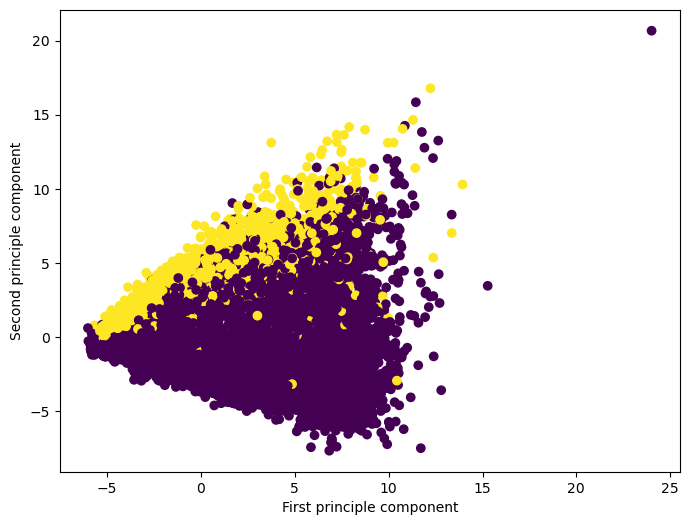

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['dropout'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [28]:
pca = PCA(n_components=0.85) # keep 85% of the variance in the original data
pca.fit(scaled_data)

PCA(n_components=0.85)

In [29]:
pca.n_components_

18

In [30]:
x_pca = pca.transform(scaled_data)

In [31]:
scaled_data.shape

(48522, 44)

In [32]:
x_pca.shape

(48522, 18)